96


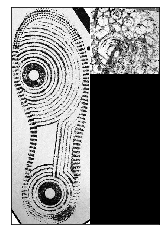

141


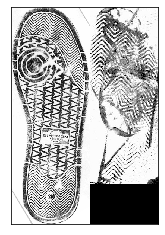

93


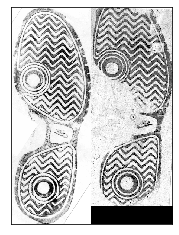

104


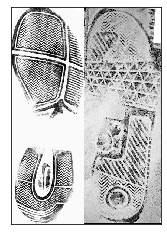

96


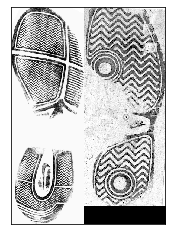

154


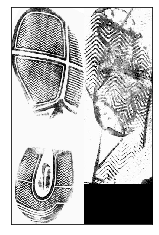

220


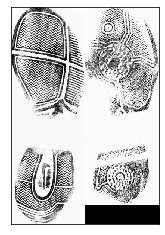

133


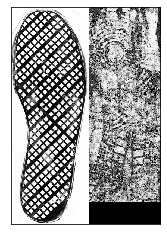

98


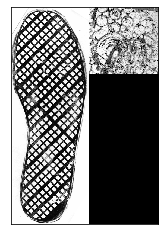

KeyboardInterrupt: 

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
# import the necessary packages
from skimage.measure import compare_ssim
path1 = glob.glob("Q2DB/*.png")
path2 = glob.glob("Q4DB/*.jpg")
Image_DB_Q3 = []
Image_DB_Q4=[]
Finale_img1=[]
Finale_img2=[]
myDict1 = {}
myDict2 = {}
rad=[]
def Detect_and_compare(img1,img2,i,j):
    length=0
    sift = cv2.xfeatures2d.SIFT_create()
    kp_1, desc_1 = sift.detectAndCompute(img1[i], None)
    kp_2, desc_2 = sift.detectAndCompute(img2[j], None)
    index_params = dict(algorithm=0, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)        
    matches = flann.knnMatch(desc_1, desc_2, k=2)
    good_points = []
    ratio = 0.8
    for m, n in matches:
        if m.distance < ratio*n.distance:
            good_points.append(m)
    if(len(good_points)>=80):
        length=len(good_points)
    return length   
def concatenate(img1,img2,shape):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

#create empty matrix
    vis = np.zeros((max(h1, h2), w1+w2,3), np.uint8)

#combine 2 images
    vis[:h1, :w1,:3] = img1
    vis[:h2, w1:w1+w2,:3] = img2
    return vis
def showImages(ImgDB,indexI,ImgDB2,indexJ):
    final=concatenate(ImgDB[indexI-1],ImgDB2[indexJ-1],1)
    plt.imshow(final)
    plt.xticks([]), plt.yticks([])
    plt.show()  
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)        
def Read_img(path_to_directory,db):
    for img in path_to_directory:
        n = cv2.imread(img)
        db.append(n)
def Preformjob(cv_img,free_parm):
    Copy_cv_img = []
    i=0
    for img in cv_img:
        if(free_parm==1):
            img=adjust_gamma(img,2.5)
        n=cv2.medianBlur(img, 5);
        n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY)
        i+=1
        if(free_parm==0):
            changeable=70
        else:
            changeable=55
        circles=cv2.HoughCircles(n, cv2.HOUGH_GRADIENT, 1.1, minDist=20,param1=350,param2=changeable,minRadius=8,
               maxRadius=82)    
        if circles is not None:
            circles = np.round(circles[0, :]).astype("int")
            if(free_parm==0):
                Finale_img1.append(img)
                name=path1[i-1]
                Finale_img=Finale_img1
            if(free_parm==1):
                Finale_img2.append(img)
                name=path2[i-1]
                Finale_img=Finale_img2    
            rad=[]    
            for (x, y, r) in circles:
                if(r==0):
                    del Finale_img[-1]
                if (r!=0): 
                    rad.append(r)
                    if(free_parm==0):
                        myDict1[name]=rad
                    else:
                        myDict2[name]=rad
        Copy_cv_img.append(n)
Read_img(path1,Image_DB_Q3)
Read_img(path2,Image_DB_Q4)
Preformjob(Image_DB_Q3,0)
Preformjob(Image_DB_Q4,1)

i=0
j=0
for v1 in myDict1.values():
    i+=1
    j=0
    for v2 in myDict2.values():
        j+=1
        if(bool(set(v1).intersection(v2))):
            temp=Detect_and_compare(Finale_img1,Finale_img2,i-1,j-1)
            if(temp>=90):
                print(temp)
                showImages(Finale_img1,i,Finale_img2,j)
         
         